In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
car = pd.read_csv("Cardetails.csv")

In [3]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
car.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [5]:
car.shape

(8128, 13)

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
car.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [8]:
import missingno as msno

<AxesSubplot:>

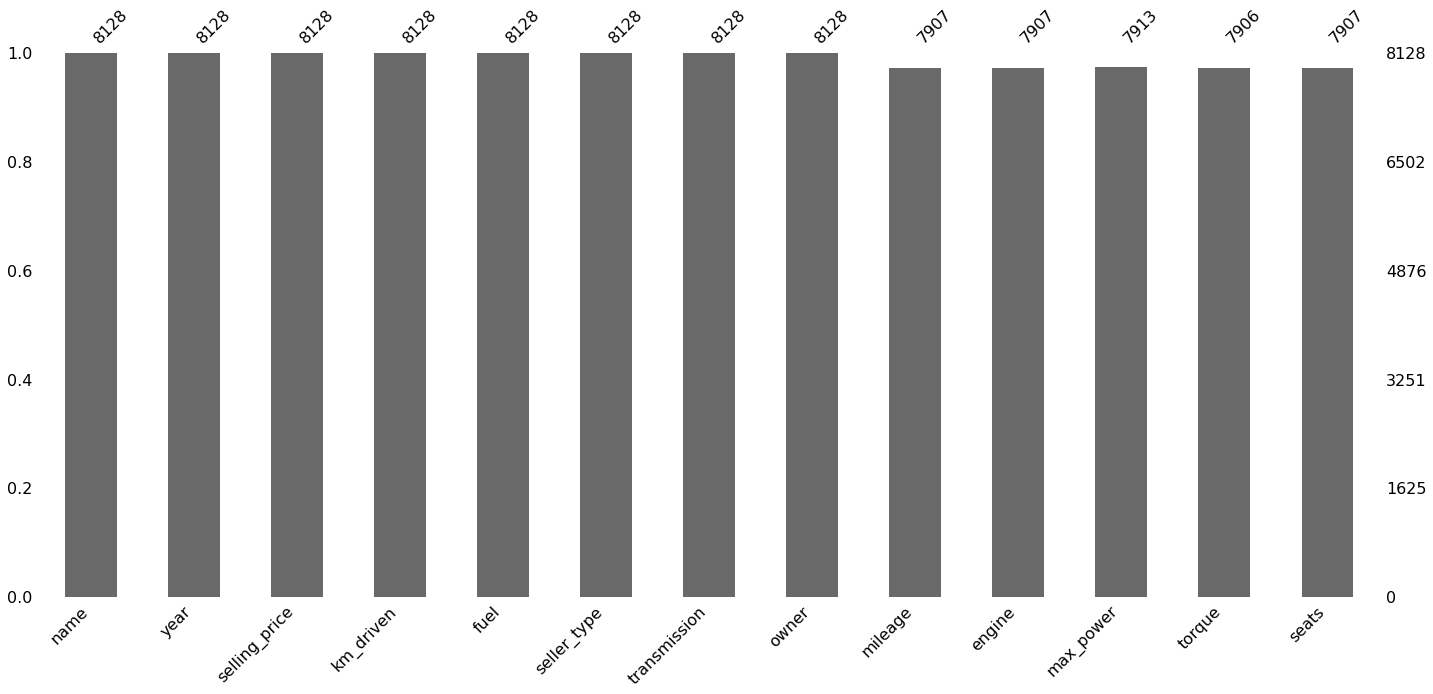

In [9]:
msno.bar(car)

<AxesSubplot:>

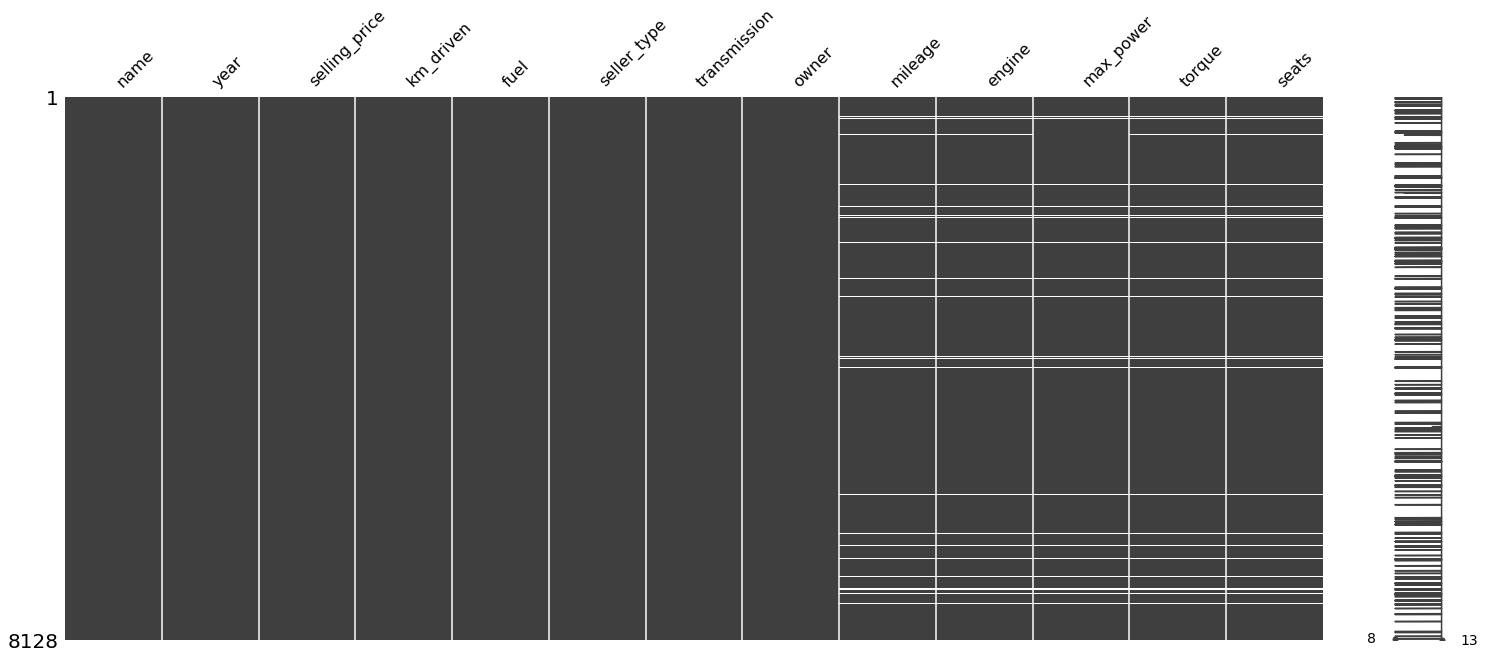

In [10]:
msno.matrix(car)

In [11]:
car = car.dropna(how = 'any') #Eksik değerlerden kurtulma
car.shape

(7906, 13)

In [12]:
import re

In [13]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [12]:
torque_list = car['torque'].to_list()
# torque_list[:2]
torque_rpm = []
def extractingRPM(x):
  for item in x:
    res = item.replace(".", "")
    res = res.replace(",", "")
    temp = [int(s) for s in re.findall(r'\d+', res)]
    torque_rpm.append(max(temp))

extractingRPM(torque_list)
print(torque_list[:2])
print(torque_rpm[:2])

['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm']
[2000, 2500]


In [13]:
car['torque_rpm'] = torque_rpm

car.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500


In [14]:
mil_list = car['mileage'].to_list()
# torque_list[:2]
mil_kmpl = []
def extractingmil(x):
  for item in x:
    temp = []
    try:
      for s in item.split(" "):
        temp.append(float(s))
    except:
      pass
    mil_kmpl.append(max(temp))

extractingmil(mil_list)
print(mil_list[:2])
print(mil_kmpl[:2])

['23.4 kmpl', '21.14 kmpl']
[23.4, 21.14]


In [15]:
car['mil_kmpl'] = mil_kmpl

car.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14


In [23]:
engine_list = car['engine'].to_list()
# torque_list[:2]
engine_cc = []
def extractingEngine(x):
  for item in x:
    temp = []
    try:
      for s in item.split(" "):
        temp.append(float(s))
    except:
      pass
    engine_cc.append(max(temp))

extractingEngine(engine_list)
print(engine_list[:2])
print(engine_cc[:2])

['1248 CC', '1498 CC']
[1248.0, 1498.0]


In [24]:
car['engine_cc'] = engine_cc

car.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,engine_cc
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1498.0


In [18]:
power_list = car['max_power'].to_list()
# torque_list[:2]
max_power = []
def extractingPower(x):
  for item in x:
    temp = []
    try:
      for s in item.split(" "):
        temp.append(float(s))
    except:
      pass
    max_power.append(max(temp))

extractingPower(power_list)
print(power_list[:2])
print(max_power[:2])

['74 bhp', '103.52 bhp']
[74.0, 103.52]


In [19]:
car['max_power_new'] = max_power

car.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14,1498.0,103.52


In [20]:
new = car.drop(['mileage', 'engine', 'max_power', 'torque'], axis = 1)

In [21]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   seats          7906 non-null   float64
 9   torque_rpm     7906 non-null   int64  
 10  mil_kmpl       7906 non-null   float64
 11  engine_cc      7906 non-null   float64
 12  max_power_new  7906 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 864.7+ KB


In [22]:
new.describe().T

,count,mean,std,min,25%,50%,75%,max
year,7906.0,2013.983936,3.863695,1994.0,2012.00,2015.0,2017.00,2020.0
selling_price,7906.0,649813.720845,813582.748354,29999.0,270000.00,450000.0,690000.00,10000000.0
km_driven,7906.0,69188.659752,56792.296343,1.0,35000.00,60000.0,95425.00,2360457.0
seats,7906.0,5.416393,0.959208,2.0,5.00,5.0,5.00,14.0
torque_rpm,7906.0,3474.631419,2579.612132,400.0,2500.00,3000.0,4000.00,43639.0
mil_kmpl,7906.0,19.419861,4.036263,0.0,16.78,19.3,22.32,42.0
engine_cc,7906.0,1458.708829,503.893057,624.0,1197.00,1248.0,1582.00,3604.0
max_power_new,7906.0,91.587374,35.747216,32.8,68.05,82.0,102.00,400.0


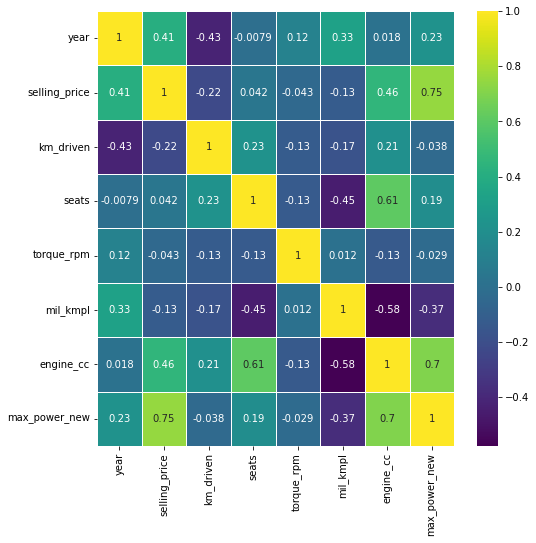

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(new.corr(),annot=True,cmap='viridis',linewidths=.5);

In [24]:
for i in new.columns:
    x = new[i].value_counts()
    print("Column name is:",i,
          "and it value is:","\n", x)
    print('-------------------------------------')
    

Column name is: name and it value is: 
 Maruti Swift Dzire VDI                          129
Maruti Alto 800 LXI                              82
Maruti Alto LXi                                  71
BMW X4 M Sport X xDrive20d                       62
Maruti Swift VDI                                 61
                                               ... 
Honda Jazz 1.2 S AT i VTEC                        1
Hyundai i20 Active 1.2 SX with AVN                1
Ambassador CLASSIC 1500 DSL AC                    1
Tata Harrier XZ Dark Edition BSIV                 1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV      1
Name: name, Length: 1982, dtype: int64
-------------------------------------
Column name is: year and it value is: 
 2017    1010
2016     856
2018     806
2015     775
2013     668
2012     621
2014     620
2019     583
2011     570
2010     375
2009     231
2008     201
2007     173
2006     102
2005      76
2020      74
2004      51
2003      37
2002      19
2000      15
1999      1

In [25]:
#Kategorik verileri tamsayı biçimine dönüştürme.

def ref1(x):
    if x == 'Manual':
        return 1
    else:
        return 0

new['transmission'] = new['transmission'].map(ref1)


In [26]:
def ref2(x):
    if x == 'Individual':
        return 1
    elif x == 'Dealer':
        return 0
    else:
        return -1

new['seller_type'] = new['seller_type'].map(ref2)

In [27]:
def ref3(x):
    if x == 'Petrol':
        return 1
    elif x == 'Diesel':
        return 0
    else:
        return -1

new['fuel'] = new['fuel'].map(ref3)

In [28]:
owners = pd.get_dummies(new['owner'])

X = pd.concat([new, owners], axis=1)

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  7906 non-null   int64  
 1   km_driven             7906 non-null   int64  
 2   fuel                  7906 non-null   int64  
 3   seller_type           7906 non-null   int64  
 4   transmission          7906 non-null   int64  
 5   seats                 7906 non-null   float64
 6   torque_rpm            7906 non-null   int64  
 7   mil_kmpl              7906 non-null   float64
 8   engine_cc             7906 non-null   float64
 9   max_power_new         7906 non-null   float64
 10  First Owner           7906 non-null   uint8  
 11  Fourth & Above Owner  7906 non-null   uint8  
 12  Second Owner          7906 non-null   uint8  
 13  Test Drive Car        7906 non-null   uint8  
 14  Third Owner           7906 non-null   uint8  
dtypes: float64(4), int64(

In [29]:
X

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,0,1,1,First Owner,5.0,2000,23.40,1248.0,74.00,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,1,1,Second Owner,5.0,2500,21.14,1498.0,103.52,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,1,1,Third Owner,5.0,2700,17.70,1497.0,78.00,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,1,1,First Owner,5.0,2750,23.00,1396.0,90.00,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,1,1,First Owner,5.0,4500,16.10,1298.0,88.20,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,1,1,1,First Owner,5.0,4000,18.50,1197.0,82.85,1,0,0,0,0
8124,Hyundai Verna CRDi SX,2007,135000,119000,0,1,1,Fourth & Above Owner,5.0,2750,16.80,1493.0,110.00,0,1,0,0,0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,0,1,1,First Owner,5.0,2000,19.30,1248.0,73.90,1,0,0,0,0
8126,Tata Indigo CR4,2013,290000,25000,0,1,1,First Owner,5.0,3000,23.57,1396.0,70.00,1,0,0,0,0


In [30]:
X.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,0,1,1,First Owner,5.0,2000,23.40,1248.0,74.00,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,1,1,Second Owner,5.0,2500,21.14,1498.0,103.52,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,1,1,Third Owner,5.0,2700,17.70,1497.0,78.00,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,1,1,First Owner,5.0,2750,23.00,1396.0,90.00,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,1,1,First Owner,5.0,4500,16.10,1298.0,88.20,1,0,0,0,0


In [31]:
y = X['selling_price']
X = X.drop(['selling_price', 'name', 'owner'], axis = 1)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X[:3000], y[:3000], test_size=0.2)

In [34]:
random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)

In [35]:
#Fit
random_model.fit(Xtrain, ytrain)

y_pred = random_model.predict(Xtest)

#Checking the accuracy
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

99.19 %


In [36]:
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

93.28 %


In [37]:
reg = LinearRegression()

reg.fit(Xtrain, ytrain)

LinearRegression()

In [38]:
print(round(reg.score(Xtrain, ytrain), 2))

0.7


In [39]:
print(round(reg.score(Xtest, ytest), 2))

0.63
